# Part2
In this lab session we will focus on the use of scientific computing libraries to efficiently process, transform, and manage data. Furthermore, we will provide best practices and introduce visualization tools for effectively conducting big data analysis and visualization.

---

In [1]:
import pandas as pd
import numpy as np
import helpers.data_mining_helpers as dmh


In [2]:
# Three data files
PATH1 = 'data/amazon_cells_labelled.txt'
PATH2 = 'data/imdb_labelled.txt'
PATH3 = 'data/yelp_labelled.txt'

def add_data(sentences,labels,category, PATH,choose=0):

    file = open(PATH, 'r', encoding="utf-8")

    for line in file:
        line = line.strip()
        ss = line.split('\t')
        sentences.append(ss[0])
        labels.append(ss[1])
        if(choose==0):
            category.append('amazon')
        elif(choose==1):
            category.append('imdb')
        else:
            category.append('yelp')
    return sentences,labels,category

# Read data
sentences=[]
labels=[]
category=[]
sentences,labels,category= add_data(sentences,labels,category,PATH1,0)
sentences,labels,category= add_data(sentences,labels,category,PATH2,1)
sentences,labels,category= add_data(sentences,labels,category,PATH3,2)

# get pandas.dataframe

Combined = [sentences, labels,category]
Combined = np.array(Combined).T
df = pd.DataFrame(Combined, columns=['Sentences', 'Labels','category'])

X=df
df.head()

,Sentences,Labels,category
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon


### 4.1 Missing Values

In [3]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,Sentences,Labels,category
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### 4.2 Dealing with Duplicate Data


In [4]:
sum(X.duplicated())

17

In [5]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [6]:
len(X)

2966

## sample

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

0    1486
1    1480
Name: Labels, dtype: int64


<AxesSubplot:title={'center':'label distribution'}>

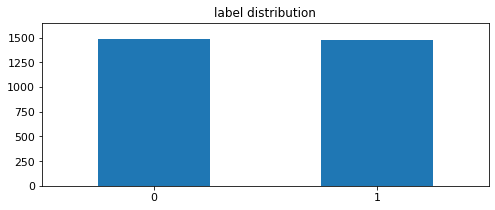

In [8]:
print(X.Labels.value_counts())

# plot barchart for X_sample
X.Labels.value_counts().plot(kind = 'bar',
                                    title = 'label distribution',
                                    ylim = [0, 1650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

1    504
0    496
Name: Labels, dtype: int64
0    1486
1    1480
Name: Labels, dtype: int64


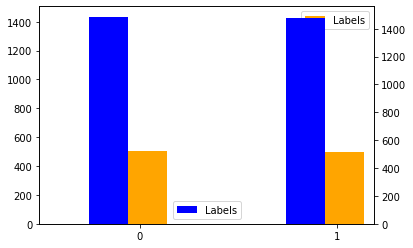

In [9]:
X_sample = X.sample(n=1000) #random state
# Answer here
upper_bound = max(X.Labels.value_counts())+20
print(X_sample.Labels.value_counts())
print(X.Labels.value_counts())
# plot barchart for X_sample

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2

X_sample.Labels.value_counts().plot(kind='bar', color='orange', ax=ax,ylim=[0,upper_bound], rot=0,width=width, position=0.3,legend='w0')
X.Labels.value_counts().plot(kind='bar', color='blue', ax=ax2,rot=0, width=width, position=1.3,legend=True)

ax.set_label('category_name')
ax2.set_label('category_name')
plt.show()

You can use following command to see other available styles to prettify your charts.
```python
print(plt.style.available)```

---

In [10]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.Sentences)

In [12]:
count_vect.get_feature_names()[::500][0:10]

['00',
 'blandest',
 'contrast',
 'elsewhere',
 'gosh',
 'keep',
 'navigate',
 'promise',
 'seuss',
 'teeth']

In [13]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")

['hello', 'world']

If you take a closer look at the `X` table now, you will see the new columns `unigrams` that we have added. You will notice that it contains an array of tokens, which were extracted from the original `text` field. At first glance, you will notice that the tokenizer is not doing a great job, let us take a closer at a single record and see what was the exact result of the tokenization using the `nltk` library.

In [14]:
analyze(X.Sentences[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

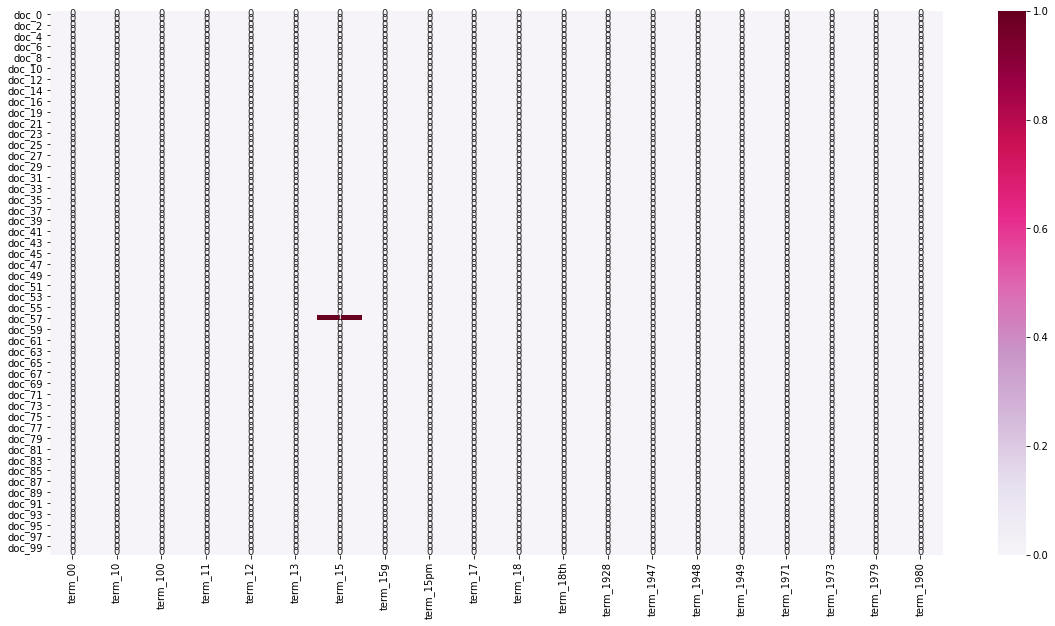

In [81]:

import seaborn as sns
"""plot_x = ["term__"+str(i) for i in count_vect.get_feature_names()[3270:3300]]
plot_y = ["text_"+ str(i) for i in list(X.index)[1000:1020]]
plot_z = X_counts[1000:1020, 3270:3300].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(15, 8))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)
"""
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:100]]
plot_z = X_counts[0:100, 0:20].toarray()


df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [21]:
from sklearn.decomposition import PCA
#Dimensionality Reduction
try:
    X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
except:
    print("test")
print("reduced shape: "+str(X_reduced.shape))

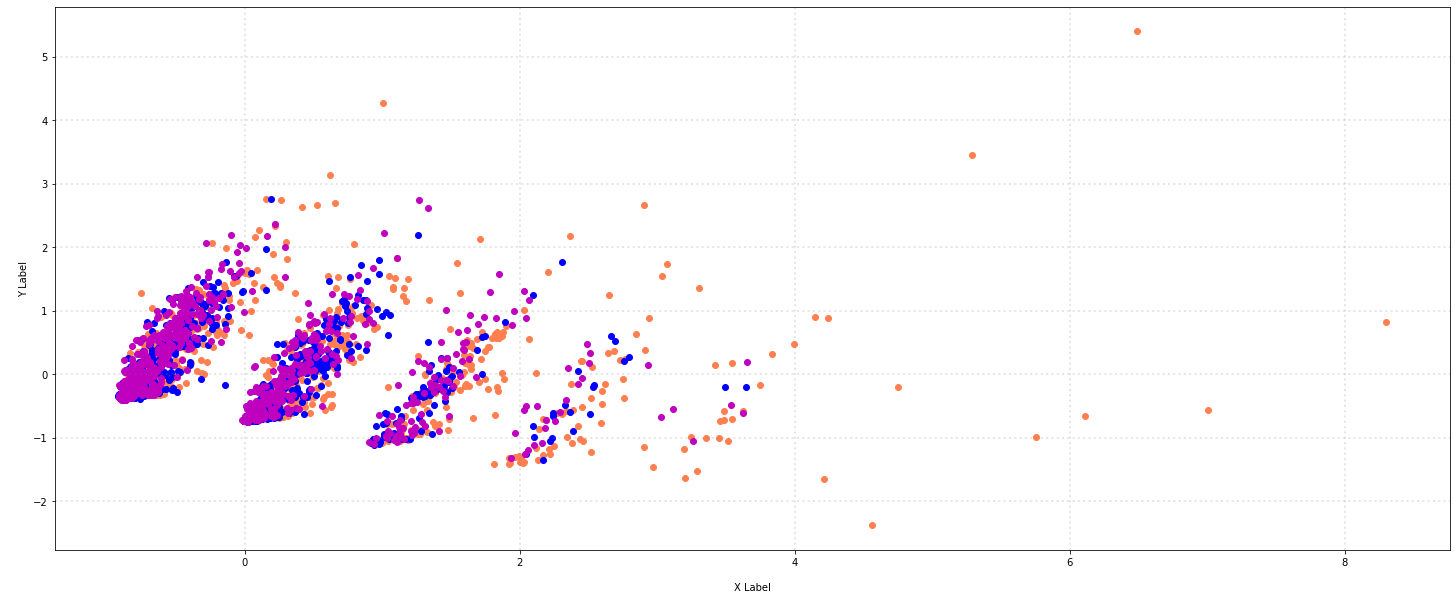

In [24]:
#plot scatter
col = ['coral', 'blue', 'm']
categories = ['imdb','yelp','amazon']
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, cate in zip(col, categories):
    xs = X_reduced[X['category'] == cate].T[0]
    ys = X_reduced[X['category'] == cate].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

test


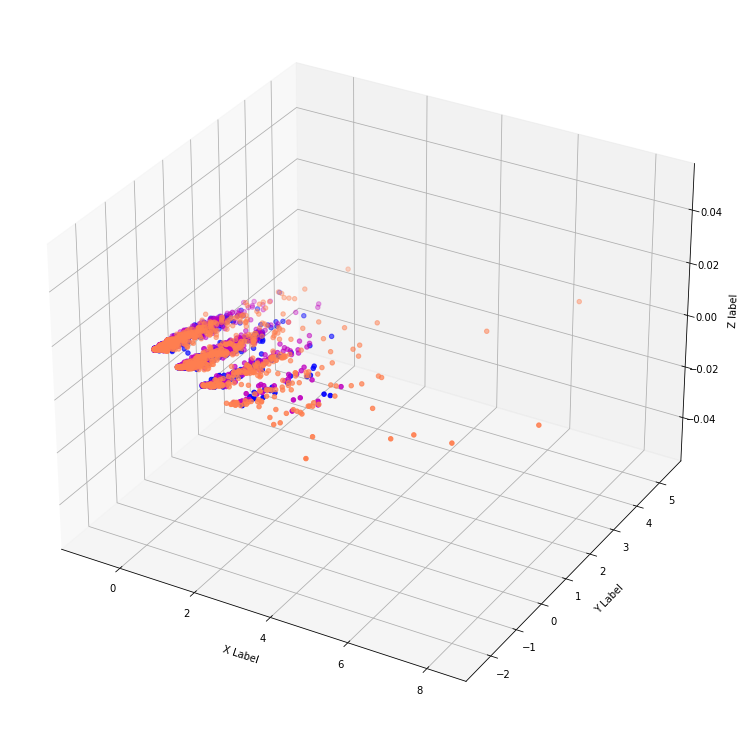

In [27]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D
try:
    X_reduced2 = PCA(n_components = 3).fit_transform(X_counts.toarray())
except:
    print('test')
col2 = ['coral', 'blue', 'black', 'm']
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced2[X['category'] == category].T[0]
    ys = X_reduced2[X['category'] == category].T[1]
    zs = X_reduced2[X['category'] == category].T[2]
    
    ax.scatter(xs, ys, c = c, marker='o')
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ label')
plt.show()

In [28]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [29]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [30]:
term_frequencies[0]

1

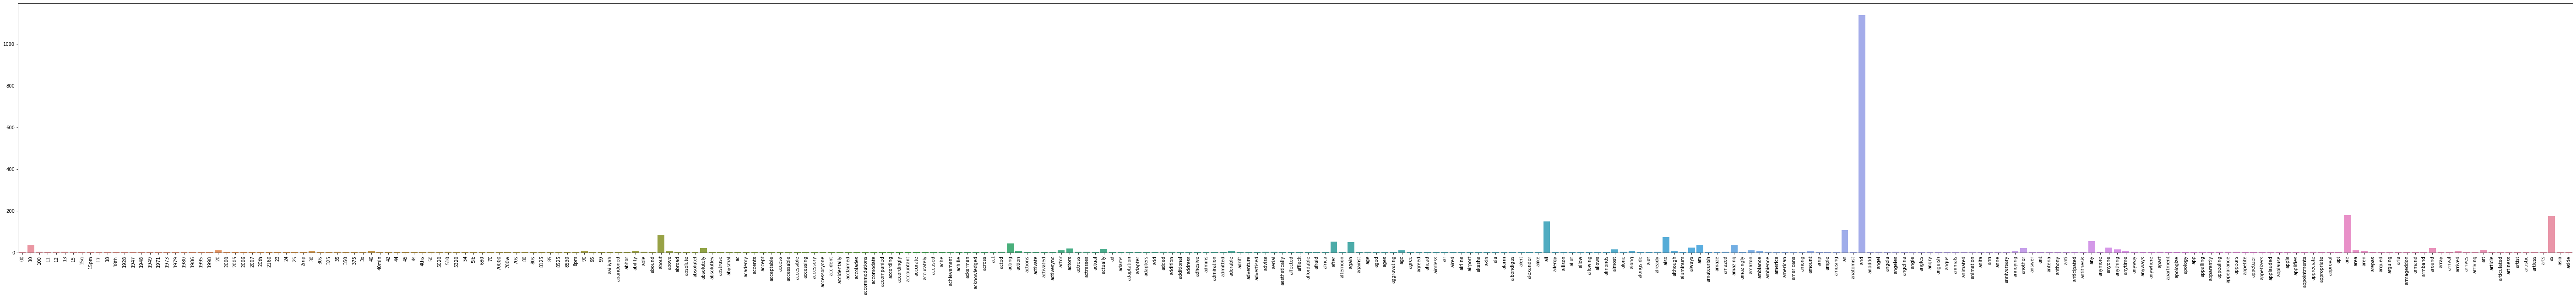

In [31]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

---

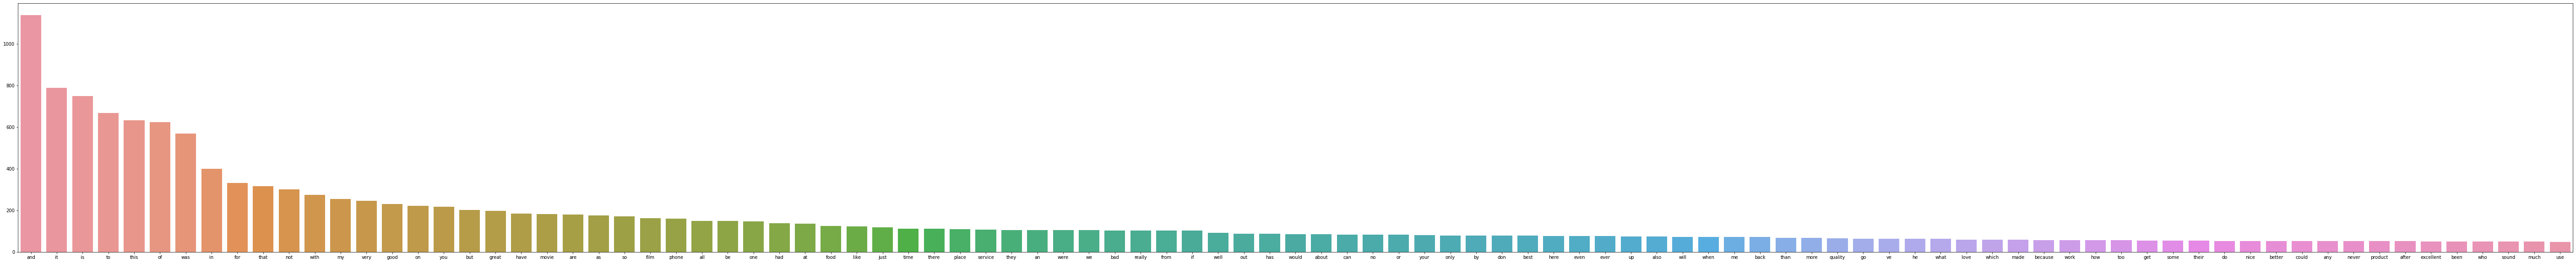

In [35]:
#long tail
index = np.argsort(-term_frequencies)

feature_name = np.asarray(count_vect.get_feature_names())

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=feature_name[index[1:100]], 
            y=term_frequencies[index[1:100]])

---

Since we already have those term frequencies, we can also transform the values in that vector into the log distribution. All we need is to import the `math` library provided by python and apply it to the array of values of the term frequency vector. This is a typical example of attribute transformation. Let's go for it. The log distribution is a technique to visualize the term frequency into a scale that makes you easily visualize the distribution in a more readable format. In other words, the variations between the term frequencies are now easy to observe. Let us try it out!

In [36]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

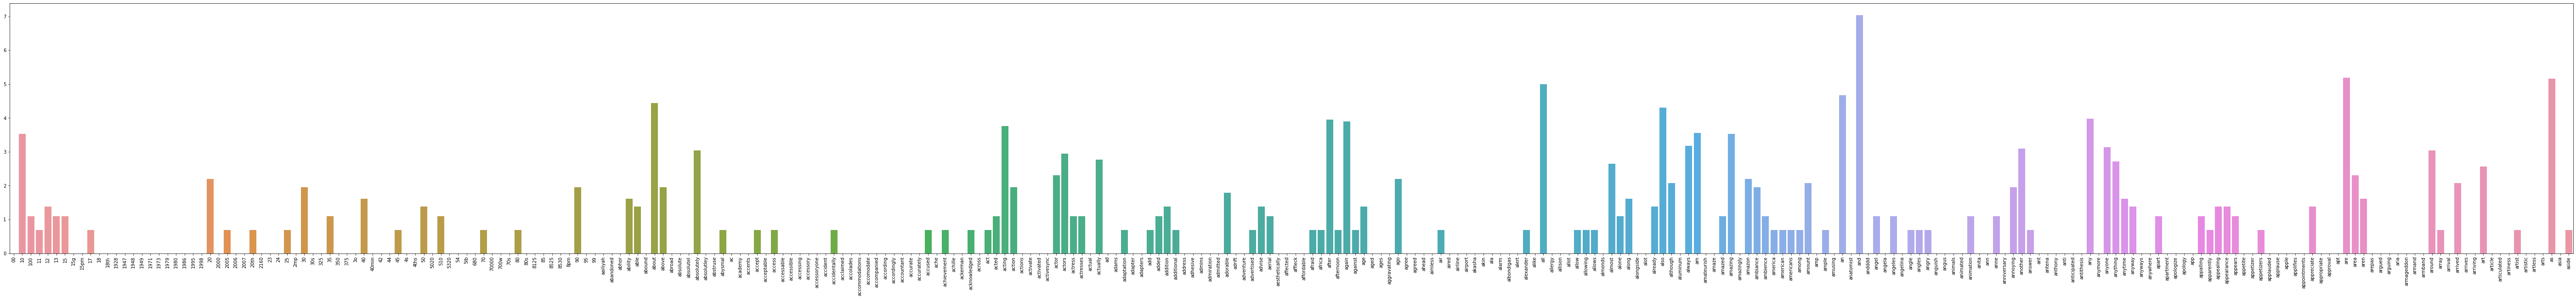

In [37]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

---

### 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `category_name`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code. 

In [38]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [39]:
mlb = preprocessing.LabelBinarizer()

In [40]:
mlb.fit(X.category)

LabelBinarizer()

In [41]:
mlb.classes_

array(['amazon', 'imdb', 'yelp'], dtype='<U6')

In [42]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [43]:
X[0:9]

,Sentences,Labels,category,bin_category
0,So there is no way for me to plug it in here i...,0,amazon,"[1, 0, 0]"
1,"Good case, Excellent value.",1,amazon,"[1, 0, 0]"
2,Great for the jawbone.,1,amazon,"[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon,"[1, 0, 0]"
4,The mic is great.,1,amazon,"[1, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0,amazon,"[1, 0, 0]"
6,If you have several dozen or several hundred c...,0,amazon,"[1, 0, 0]"
7,If you are Razr owner...you must have this!,1,amazon,"[1, 0, 0]"
8,"Needless to say, I wasted my money.",0,amazon,"[1, 0, 0]"


Take a look at the new attribute we have added to the `X` table. You can see that the new attribute, which is called `bin_category`, contains an array of 0's and 1's. The `1` is basically to indicate the position of the label or category we binarized. If you look at the first two records, the one is places in slot 2 in the array; this helps to indicate to any of the algorithms which we are feeding this data to, that the record belong to that specific category. 

Attributes with **continuous values** also have strategies to tranform the data; this is usually called **Discretization** (please refer to the text book for more inforamation).

---

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [45]:
# Answer here
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
mlb.classes_
X['bin_category_name'] = mlb.transform(X['category']).tolist()
X[0:9]

,Sentences,Labels,category,bin_category,bin_category_name
0,So there is no way for me to plug it in here i...,0,amazon,"[1, 0, 0]","[1, 0, 0]"
1,"Good case, Excellent value.",1,amazon,"[1, 0, 0]","[1, 0, 0]"
2,Great for the jawbone.,1,amazon,"[1, 0, 0]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon,"[1, 0, 0]","[1, 0, 0]"
4,The mic is great.,1,amazon,"[1, 0, 0]","[1, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0,amazon,"[1, 0, 0]","[1, 0, 0]"
6,If you have several dozen or several hundred c...,0,amazon,"[1, 0, 0]","[1, 0, 0]"
7,If you are Razr owner...you must have this!,1,amazon,"[1, 0, 0]","[1, 0, 0]"
8,"Needless to say, I wasted my money.",0,amazon,"[1, 0, 0]","[1, 0, 0]"


---

# 6. Data Exploration

Sometimes you need to take a peek at your data to understand the relationships in your dataset. Here, we will focus in a similarity example. Let's take 3 documents and compare them.

In [48]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['Sentences']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['Sentences']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['Sentences']
document_to_transform_3.append(random_record_3)

Let's look at our emails.

In [49]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [50]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [51]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


---

## Part3

In [57]:
# get all feature
feature_name
term_name = count_vect.get_feature_names()
term_name = ["term_"+str(i) for i in term_name]

In [58]:
df_all_term = pd.DataFrame(list(zip(term_name, term_frequencies)), 
               columns =['term', 'frequency'])

In [59]:
# create term to be ploted
term_name_wc = count_vect.get_feature_names()

plotwc = dict(zip(term_name_wc, df_all_term['frequency'].tolist()))

In [66]:
# we can see top frequency of what word appears
df_all_term.sort_values(by=['frequency'], ascending=False).head(10)

,term,frequency
4529,term_the,1949
216,term_and,1138
2431,term_it,789
2426,term_is,750
4607,term_to,668
4556,term_this,633
3096,term_of,624
4966,term_was,569
2313,term_in,400
1828,term_for,332


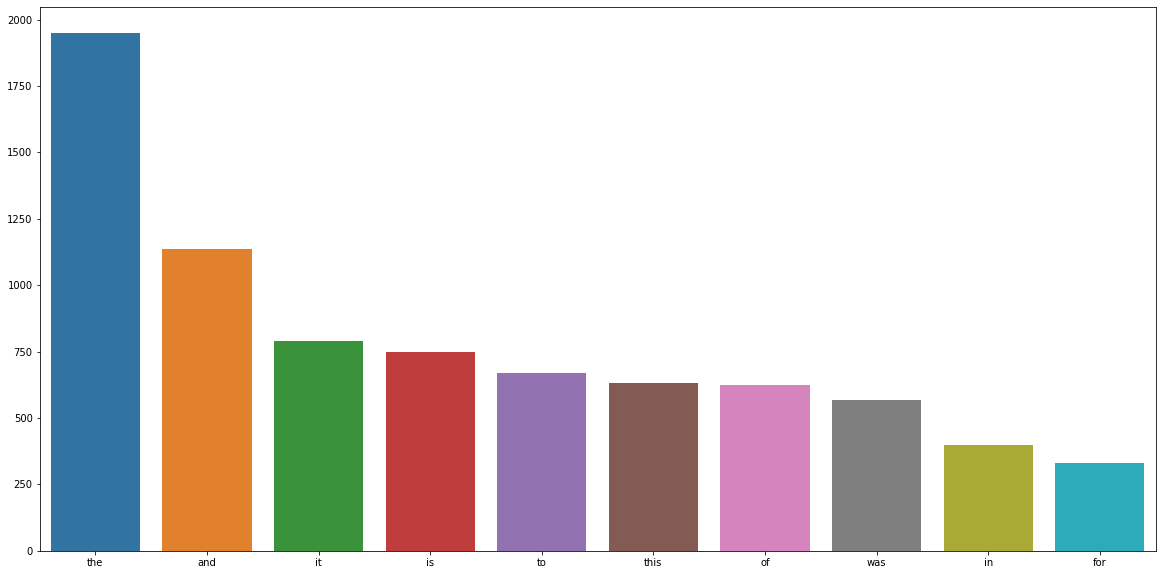

In [68]:
plt.subplots(figsize=(20, 10))
g = sns.barplot(x=feature_name[index[0:10]], 
            y=term_frequencies[index[0:10]])

# ＴＦ-ＩＤＦ

In [71]:
from sklearn.feature_extraction.text import TfidfTransformer
vecterizer = CountVectorizer()
count = vecterizer.fit_transform(X.Sentences)
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(count)
tfidf_matrix = tfidf.toarray()
tfidf_matrix.shape

(2966, 5153)

In [78]:
#train by tfidf_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test = train_test_split(tfidf_matrix, X['Labels'], test_size=0.1,random_state=1)

In [79]:
clf_1 = MultinomialNB()
clf_1.fit(x_train, y_train)
y_pred = clf_1.predict(x_test)

accuracy_score(y_test, y_pred)

0.8215488215488216

In [80]:
##train by word frequency features 

x_train2,x_test2,y_train2,y_test2 = train_test_split(count.toarray(), y, test_size=0.1,random_state=1)

clf_2 = MultinomialNB()
clf_2.fit(x_train2, y_train2)
y_pred2 = clf_2.predict(x_test2)

accuracy_score(y_test2, y_pred2)

0.835016835016835

### The result shows that word frequency has a better performancae than tf-idf.
### But it's stange, in my experience, tf-idf should be better.
### I think both of them is simalry, and may it is in reasonable error

# part4


- Those parts with for loop, would cost a lot of time running when the whole dataset is big.
<br>compute with matrix is prefered in order to get effecience from parallel computation.
----
- in countvectorizer part, we include all words like(the, and, it...), which is not meanful.
<br>we can use stop words parameter to elimate these words.